In [2]:
import streamlit as st
from streamlit_folium import st_folium
import folium
import json
import pandas as pd

# 대한민국 지도 경계 데이터를 불러옵니다.
with open("SIDO_MAP_2022_cp949.json", "r", encoding='cp949') as f:
    geo_data = json.load(f)

# 인구 밀도 데이터를 불러옵니다.
pop_den = pd.read_csv("pop_den.csv", encoding='utf-8')
pd.DataFrame(pop_den)


,행정구역별,2020,2021,2022
0,전국,516.2,515.2,514.6
1,서울특별시,15839.0,15650.1,15560.7
2,부산광역시,4348.9,4316.4,4272.8
3,대구광역시,2728.6,2702.2,2673.7
4,인천광역시,2765.1,2772.8,2801.3
5,광주광역시,2948.5,2944.0,2931.9
6,대전광역시,2758.1,2742.8,2730.7
7,울산광역시,1069.0,1055.0,1044.9
8,세종특별자치시,761.3,787.7,822.9
9,경기도,1325.3,1338.9,1344.9


In [3]:
pop_den.describe()

,2020,2021,2022
count,18.000000,18.000000,18.000000
mean,2045.594444,2032.211111,2025.116667
std,3678.648378,3635.094546,3612.959623
min,90.400000,90.400000,90.800000
25%,233.550000,232.000000,231.325000
50%,638.750000,651.450000,668.750000
75%,2750.725000,2732.650000,2716.450000
max,15839.000000,15650.100000,15560.700000


In [4]:
pd.DataFrame(pop_den)

,행정구역별,2020,2021,2022
0,전국,516.2,515.2,514.6
1,서울특별시,15839.0,15650.1,15560.7
2,부산광역시,4348.9,4316.4,4272.8
3,대구광역시,2728.6,2702.2,2673.7
4,인천광역시,2765.1,2772.8,2801.3
5,광주광역시,2948.5,2944.0,2931.9
6,대전광역시,2758.1,2742.8,2730.7
7,울산광역시,1069.0,1055.0,1044.9
8,세종특별자치시,761.3,787.7,822.9
9,경기도,1325.3,1338.9,1344.9


서울특별시의 인구 밀도?

In [9]:
pop_den.loc[pop_den["행정구역별"] == "서울특별시",'2022']

1    15560.7
Name: 2022, dtype: float64

In [11]:
pop_den.loc[pop_den["행정구역별"] == "서울특별시",'2022'].values[0]

15560.7

In [12]:
type(pop_den.loc[pop_den["행정구역별"] == "서울특별시",'2022'].values[0])

numpy.float64

In [13]:
str(pop_den.loc[pop_den["행정구역별"] == "서울특별시",'2022'].values[0])

'15560.7'

In [6]:
import pandas as pd
pop_den = pd.read_csv("pop_den.csv", encoding='utf-8')
df = pd.DataFrame(pop_den)
df

,행정구역별,2020,2021,2022
0,전국,516.2,515.2,514.6
1,서울특별시,15839.0,15650.1,15560.7
2,부산광역시,4348.9,4316.4,4272.8
3,대구광역시,2728.6,2702.2,2673.7
4,인천광역시,2765.1,2772.8,2801.3
5,광주광역시,2948.5,2944.0,2931.9
6,대전광역시,2758.1,2742.8,2730.7
7,울산광역시,1069.0,1055.0,1044.9
8,세종특별자치시,761.3,787.7,822.9
9,경기도,1325.3,1338.9,1344.9


In [8]:
df_subset = df[['행정구역별', '2022']]
df_subset

,행정구역별,2022
0,전국,514.6
1,서울특별시,15560.7
2,부산광역시,4272.8
3,대구광역시,2673.7
4,인천광역시,2801.3
5,광주광역시,2931.9
6,대전광역시,2730.7
7,울산광역시,1044.9
8,세종특별자치시,822.9
9,경기도,1344.9


In [10]:
df_subset_sorted = df_subset.sort_values(by='2022', ascending=False)
df_subset_sorted

,행정구역별,2022
1,서울특별시,15560.7
2,부산광역시,4272.8
5,광주광역시,2931.9
4,인천광역시,2801.3
6,대전광역시,2730.7
3,대구광역시,2673.7
9,경기도,1344.9
7,울산광역시,1044.9
8,세종특별자치시,822.9
0,전국,514.6


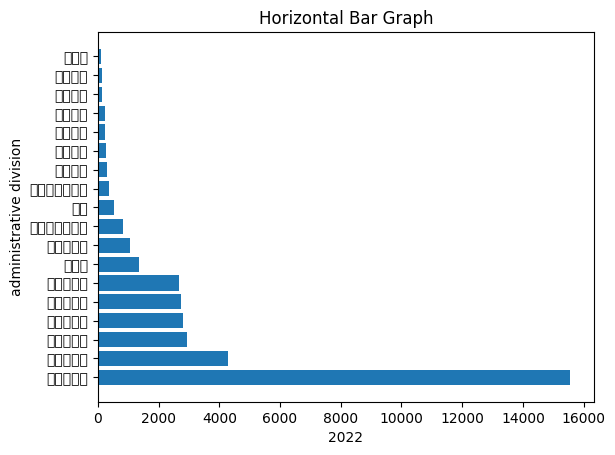

In [14]:
import matplotlib.pyplot as plt
# 그래프를 그리기 위한 데이터 추출
x_values = df_subset_sorted['2022']
y_values = df_subset_sorted['행정구역별']

# 수평 막대 그래프 그리기
plt.barh(y_values, x_values)

# 그래프 제목 설정
plt.title('Horizontal Bar Graph')

# x축 레이블 설정
plt.xlabel('2022')

# y축 레이블 설정
plt.ylabel('administrative division')

# 그래프 출력
plt.show()

In [24]:
df_subset_sorted

,행정구역별,2022
1,서울특별시,15560.7
2,부산광역시,4272.8
5,광주광역시,2931.9
4,인천광역시,2801.3
6,대전광역시,2730.7
3,대구광역시,2673.7
9,경기도,1344.9
7,울산광역시,1044.9
8,세종특별자치시,822.9
17,제주특별자치도,365.6


In [23]:
df_subset_sorted.drop(index='0', inplace=True)


KeyError: "['0'] not found in axis"

In [29]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 시스템에 설치된 폰트 확인
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
desired_font = [f for f in font_list if 'Gulim' in f]
if desired_font:
    plt.rcParams['font.family'] = 'Gulim'
else:
    print("설치된 폰트를 찾을 수 없습니다.")

설치된 폰트를 찾을 수 없습니다.
